https://www.geeksforgeeks.org/deep-learning/time-series-forecasting-using-tensorflow/

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def show_features(arr, excerpt=2):
    for i in range(arr.shape[excerpt]):
        print(f"feature {i}:")
        print(arr[:, :, i])
        print("-"*20)

# Función para crear secuencias
def ds_create_sequences(dataset, time_steps):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset.iloc[i:i+time_steps,0])  # secuencia
        y.append(dataset.iloc[i+time_steps,0])    # valor siguiente
    return np.array(X), np.array(y)
def ds_create_full_sequences(dataset, time_steps):
    df = []
    for i in range(len(dataset) - time_steps):
        df.append(dataset.iloc[i:i+time_steps+1,0])  # secuencia
    return np.array(df)

In [91]:
df = pd.read_csv("../../data/air-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df["Passengers"] = df["Passengers"].astype(float)
df = df.iloc[:,:]


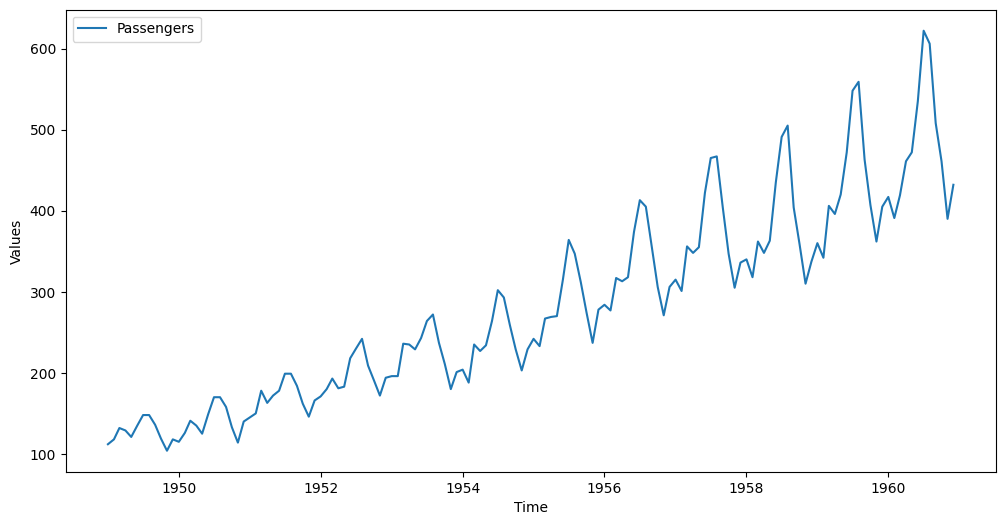

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df["Passengers"], label='Passengers')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [93]:
# Data leakage
#scaler = MinMaxScaler(feature_range=(0, 1))
#df = scaler.fit_transform(df)

In [94]:
shift   = 12
df_np = ds_create_full_sequences(df, shift)
df_np = df_np.reshape((df_np.shape[0], df_np.shape[1], 1))
show_features(df_np, excerpt=2)


feature 0:
[[112. 118. 132. ... 104. 118. 115.]
 [118. 132. 129. ... 118. 115. 126.]
 [132. 129. 121. ... 115. 126. 141.]
 ...
 [407. 362. 405. ... 606. 508. 461.]
 [362. 405. 417. ... 508. 461. 390.]
 [405. 417. 391. ... 461. 390. 432.]]
--------------------


In [ ]:
X = df_np[:, :-1, :]
y = df_np[:, -1, :]

#train_size = int(0.67 * X.shape[0])
#X_train, X_test = X[:train_size], X[train_size:]
#y_train, y_test = y[:train_size], y[train_size:]
#X_train, X_test = X[:train_size], X[train_size:]
#y_train, y_test = y[:train_size], y[train_size:]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1-0.67, shuffle=False, random_state=42
)
train_len = X_train.shape[0]
test_len = X_test.shape[0]

In [96]:
# Ajustar con entrenamiento
scaler_X = MinMaxScaler()
n_samples_train, time_steps, n_features = X_train.shape
#(n_muestras, n_features)
X_train_2d = X_train.reshape(-1, n_features)
#Escalo solo las dimensiones que corresponde
scaler_X.fit(X_train_2d)
# Transformar entrenamiento y test
X_train_scaled = scaler_X.transform(X_train_2d).reshape(n_samples_train, time_steps, n_features)
n_samples_test = X_test.shape[0]
X_test_scaled = scaler_X.transform(X_test.reshape(-1, n_features)).reshape(n_samples_test, time_steps, n_features)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of [samples, time steps, features].

In [97]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [98]:
# create and fit the LSTM network
model = Sequential()
model.add(Input(shape=X_train_scaled.shape[1:]))             # Definir la forma de entrada aquí
model.add(LSTM(4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
88/88 - 2s - 26ms/step - loss: 0.1694
Epoch 2/100
88/88 - 0s - 5ms/step - loss: 0.0651
Epoch 3/100
88/88 - 0s - 5ms/step - loss: 0.0459
Epoch 4/100
88/88 - 1s - 6ms/step - loss: 0.0377
Epoch 5/100
88/88 - 1s - 6ms/step - loss: 0.0307
Epoch 6/100
88/88 - 1s - 7ms/step - loss: 0.0252
Epoch 7/100
88/88 - 1s - 6ms/step - loss: 0.0195
Epoch 8/100
88/88 - 1s - 6ms/step - loss: 0.0162
Epoch 9/100
88/88 - 0s - 5ms/step - loss: 0.0144
Epoch 10/100
88/88 - 0s - 5ms/step - loss: 0.0133
Epoch 11/100
88/88 - 1s - 6ms/step - loss: 0.0127
Epoch 12/100
88/88 - 1s - 7ms/step - loss: 0.0123
Epoch 13/100
88/88 - 1s - 8ms/step - loss: 0.0123
Epoch 14/100
88/88 - 0s - 5ms/step - loss: 0.0122
Epoch 15/100
88/88 - 0s - 5ms/step - loss: 0.0120
Epoch 16/100
88/88 - 1s - 6ms/step - loss: 0.0120
Epoch 17/100
88/88 - 1s - 9ms/step - loss: 0.0118
Epoch 18/100
88/88 - 0s - 5ms/step - loss: 0.0117
Epoch 19/100
88/88 - 1s - 6ms/step - loss: 0.0122
Epoch 20/100
88/88 - 0s - 5ms/step - loss: 0.0115
Epoch 21

In [99]:
# make predictions
y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [100]:
# invert predictions
y_train_predict_inv = scaler_y.inverse_transform(y_train_predict)
y_test_predict_inv = scaler_y.inverse_transform(y_test_predict)

y_train_inv = scaler_y.inverse_transform(y_train_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

In [48]:
y_test_predict_inv

array([[348.4478 ],
       [357.58636],
       [404.803  ],
       [425.11826],
       [415.72372],
       [364.82556],
       [326.1877 ],
       [301.37247],
       [329.0646 ],
       [332.41782],
       [321.2189 ],
       [358.72522],
       [348.81836],
       [365.1769 ],
       [416.59286],
       [447.0383 ],
       [445.4304 ],
       [367.09036],
       [338.83163],
       [305.69434],
       [330.07474],
       [346.67926],
       [336.69348],
       [388.49707],
       [380.64133],
       [403.10992],
       [437.83054],
       [479.88138],
       [471.83054],
       [400.65417],
       [364.6184 ],
       [336.78305],
       [372.96948],
       [379.87106],
       [365.3374 ],
       [390.72546],
       [421.75427],
       [429.9322 ],
       [472.498  ],
       [517.3186 ],
       [494.5337 ],
       [427.1657 ],
       [398.45438],
       [351.4013 ]], dtype=float32)

In [101]:
trainScore = np.sqrt(mean_squared_error(y_train_inv, y_train_predict_inv))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_inv, y_test_predict_inv))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 18.66 RMSE
Test Score: 106.55 RMSE


In [102]:
df_final = pd.DataFrame({
    'Actual': np.concatenate((y_train_inv[:,0], y_test_inv[:,0]), axis=0),
    'Predicted': np.concatenate((y_train_predict_inv[:,0], y_test_predict_inv[:,0]), axis=0)
})



In [127]:
df["Predicted"] = pd.Series(np.concatenate((y_train_predict_inv[:,0], y_test_predict_inv[:,0]), axis=0), index=df.index[shift:])
df["Predicted_train"] =  pd.Series(y_train_predict_inv[:,0], index=df.index[shift:shift+y_train_predict_inv.shape[0]])
df["Predicted_test"] =  pd.Series(y_test_predict_inv[:,0], index=df.index[shift+y_train_predict_inv.shape[0]:])

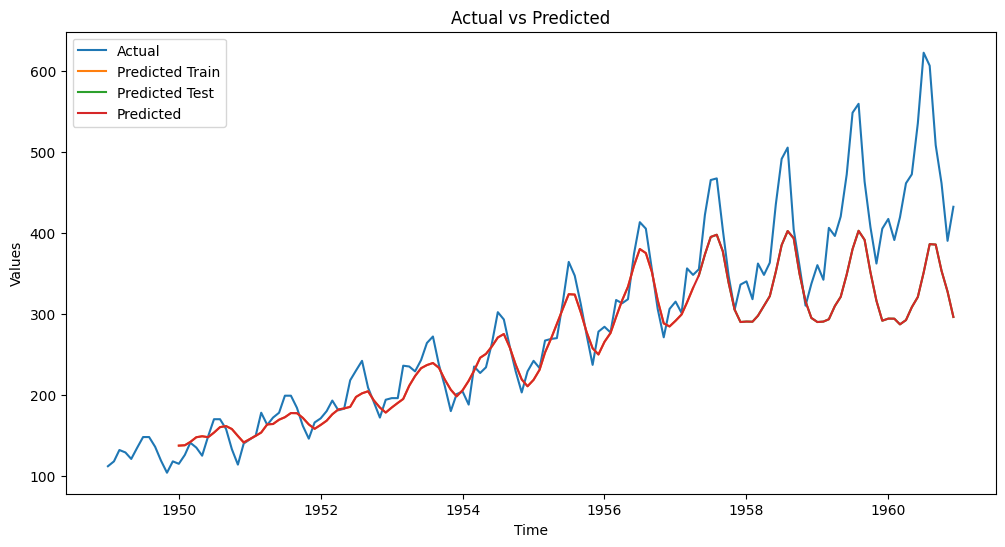

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["Passengers"], label='Actual')
plt.plot(df["Predicted_train"], label='Predicted Train')
plt.plot(df["Predicted_test"], label='Predicted Test')
#plt.plot(df["Predicted"], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()